<a href="https://colab.research.google.com/github/pranjalikathait/Machine_Learning/blob/main/Copy_of_Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Netfix Movies and TV Shows Clustering**


##### **Project Type**    - Unsupervised ML (Clustering)
##### **Contribution**    - Individual - Pranjali Kathait

# **Project Summary -**

Netflix is one of the most well-known OTT platforms in the world. I have a Netflix dataset that was acquired using Flixable, a third-party Netflix search engine. The dataset includes TV shows and films on Netflix as of 2019.
The primary goal of this project is to cluster data from the Netflix dataset. The dataset consists of 7787 rows and 12 columns. The columns include show_id, type, title, director, cast, nation, date_added, release_year, rating, duration, listed_in, and description.

My method is as follows:

1. Understand the problem statement and the dataset.
2. Data Inspection
3. Data Wrangling
4. Exploratory Data Analysis.
5. Data Preprocessing.
6. Model Implementation.

Conclusion:

Exploratory Data Analysis Conclusion:
* Netflix gained popularity in 2008 and experienced significant growth in 2015.
* There are two sorts of content available on Netflix: films and television shows.
* Prior to 2002, only films were available. However, since then, both types of content have grown significantly, particularly TV shows, as the younger population prefers them over films.
*   The United States has provided the most content (both films and television
shows) to Netflix.
*   Netflix's content caters primarily to mature audiences.
* Japan and South Korea have produced more television shows than films.
*   The top three genres of the content are international, dramas, and comedies.
*   Netflix adds the majority of its programming during the month of December.


ML Model Conclusion

* K-Means Clustering:

    Elbow Method - The K value is 2.
    
    Silhouette Score - When the K value is 2, the silhouette score is the greatest (0.42).

**So, I used KMeans clustering with the number of clusters = 2**

* Hierarchical clustering:

  Dendogram - Number of Clusters = 2.

**So, I used the Agglomerative method with the number of clusters = 2**

* DBSCAN.

    I used DBSCAN with min_samples=2
    
**In general, the best number of clusters is two.**

    



# **GitHub Link -**

https://github.com/pranjalikathait/Machine_Learning.git

# **Problem Statement**


**This dataset consist of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that number of TV Shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV Shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.
Integrating this dataset with other external dataset such as IMDB ratings, rotten tomatoes can also provide many interesting findings.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing main Libraries to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
import scipy.cluster.hierarchy as sch
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Dataset Loading

In [2]:
# Loading Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset First View

In [3]:
#reading the datafile
# Dataset First Look
df= pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [4]:
#top five rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
#last five rows
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
num_rows, num_columns= df.shape
print(f"The dataset has {num_rows} rows and {num_columns} columns.")

The dataset has 7787 rows and 12 columns.


### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
num_duplicates=df.duplicated().sum()
print("Total number of duplicate rows :",num_duplicates)

df.drop_duplicates(inplace=True)
unique_rows=df.shape[0]
print("Total number of unique rows :",unique_rows)

Total number of duplicate rows : 0
Total number of unique rows : 7787


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
missing_values_count=df.isnull().sum()
print('Missing values count in each column ', missing_values_count)
null_values_count=df.isnull().sum().sum()
print(f'The dataset has {null_values_count} missing values.')

Missing values count in each column  show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64
The dataset has 3631 missing values.


The dataset contains a total of 3631 null values, out of which 2389 belongs to director column, 718 in the cast column, 507 in the country column, 10 in date_added column and 7 in rating column. So, it is necessary to consider these null values.

<Axes: >

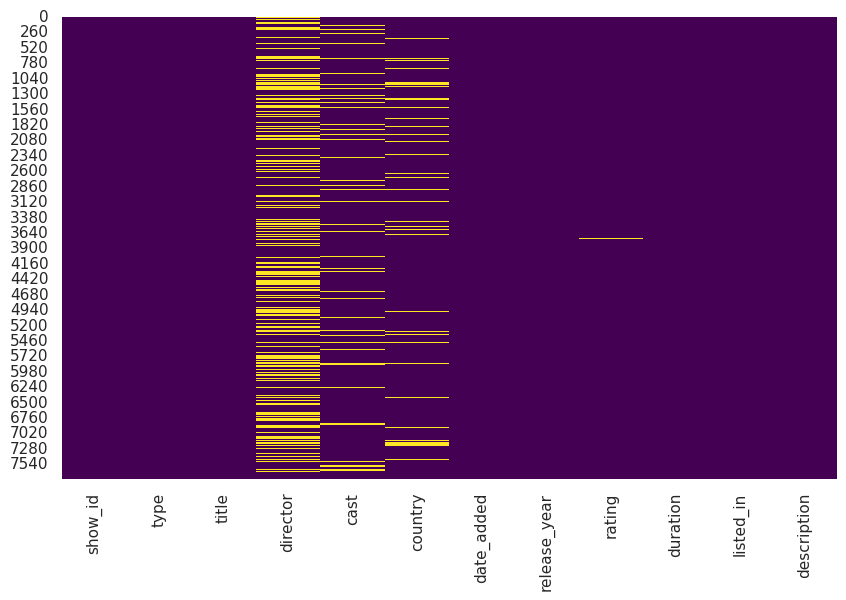

In [10]:
# Visualizing the missing values
# Creating a heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

### What did you know about your dataset?

We are provided with a Netflix Movies and TV Shows Clustering dataset with 12 different characteristics and about 7787 rows. This dataset basically has TV shows and movies and our main task is to cluster each show accordingly based on similarities and differences.This dataset do not have any duplicate row as df.duplicated().sum() is 0. This dataset do have missing or null values in director, cast, country, date_added and rating column which needs to be taken care of.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
column_names=df.columns
column_names

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description

**Each column column has its own specifications like:**

1.   show_id - represents id of a particular showtype represents type of the show
2.   type - represents type of the show whether movie or a TV show
3.   title - represents title of the show
4.   director- represents the person who have directed the show
5.   cast - represents the people working in the show
6.   country - represents the name of a particular country to which the show belongs to
7.   date_added - is the proper date when the show was added to netflix
8.   release_year - is the year when show was released
9.   rating - represents the rating of the show
10.   duration - repesents the length of the show
11.  listed_in - represnts to which category show belongs to like drama,thriller, comedy and many more
12.   description - represents basically promo of the show or summary of the show.

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
print(df.apply(lambda col: col.unique()))

show_id         [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11,...
type                                             [TV Show, Movie]
title           [3%, 7:19, 23:59, 9, 21, 46, 122, 187, 706, 19...
director        [nan, Jorge Michel Grau, Gilbert Chan, Shane A...
cast            [João Miguel, Bianca Comparato, Michel Gomes, ...
country         [Brazil, Mexico, Singapore, United States, Tur...
date_added      [August 14, 2020, December 23, 2016, December ...
release_year    [2020, 2016, 2011, 2009, 2008, 2019, 1997, 201...
rating          [TV-MA, R, PG-13, TV-14, TV-PG, NR, TV-G, TV-Y...
duration        [4 Seasons, 93 min, 78 min, 80 min, 123 min, 1...
listed_in       [International TV Shows, TV Dramas, TV Sci-Fi ...
description     [In a future where the elite inhabit an island...
dtype: object


## 3. ***Data Wrangling***

### **Data cleaning**

**Dropping irrelevant columns:**

In [14]:
df.drop(columns=['show_id'], axis=1, inplace=True)

In [15]:
df.shape

(7787, 11)

**Handling missing values**

In [16]:
def missing_values_info(data):
  '''
  This function returns the information about the missing values of a dataset
  '''
  column_names = data.columns
  missing_values = data.isnull().sum()
  missing_values_percent = round((data.isnull().sum()/data.shape[0])*100, 2)
  dataframe = pd.DataFrame({'columns': column_names,
                            'Null Values': missing_values.values,
                            'Null Values (%)': missing_values_percent})
  return dataframe.set_index('columns').sort_values('Null Values (%)', ascending=False)

In [17]:
missing_values_info(df)

,Null Values,Null Values (%)
columns,,
director,2389,30.68
cast,718,9.22
country,507,6.51
date_added,10,0.13
rating,7,0.09
type,0,0.00
title,0,0.00
release_year,0,0.00
duration,0,0.00


In [18]:
#The 'director' and 'cast' columns did not contribute significantly to clustering, so I dropped these columns as they contained a considerable number of null values.
# dropping 'director' and 'cast' columns
df.drop(['director', 'cast'], axis=1, inplace=True)

In [19]:
#dropping obervations where date_added have NaN values
df.dropna(subset=['date_added'], inplace=True)

In [20]:
df.shape

(7777, 9)

In [21]:
#filling missing values with their respective mode in 'country' and 'rating' column
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

In [22]:
#Rechecking missing values count in the dataset
df.isnull().sum()

type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# **Exploratory Data Analysis**
Exploratory Data Analysis (EDA) is a technique for extracting critical characteristics or treds for use in machine learning and deep learning models.

Before making any assumptions, we must first do EDA to gain a better knowledge of the given dataset. It also helps us comprehend the relationship between the dependent and independent variables.

### What all manipulations have you done and insights you found?

**The dataset is now have been somewhat modified as at an early stage I got to know about columns containing null values like director, cast, country, date_added and rating. So, I dropped director column as it was having maximum number of null or missing values and cast column due to its no contribution or very less contribution in clustering and also dropped rows where date_added column had NaN values. Rating and country columns also had null or missing values so I filled them using fillna.**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [23]:
# release_year value counts
df['release_year'].value_counts()

2018    1120
2017    1012
2019     996
2016     881
2020     868
        ... 
1925       1
1964       1
1966       1
1947       1
1959       1
Name: release_year, Length: 73, dtype: int64

In [24]:
#Past years mostly have only one value, so I will be considering years from 2000 onwards
# movies released after 2000
growth_year = df[df['release_year'] > 2000]

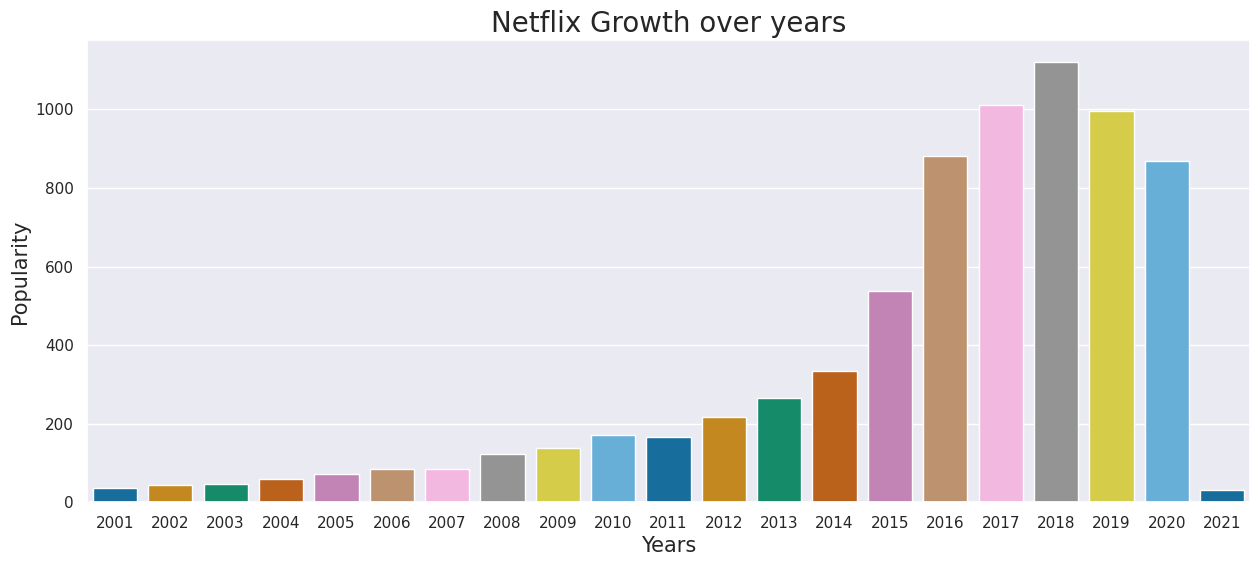

In [25]:
# setting the figure size
plt.figure(figsize=(15, 6))

# visualizing countplot
sns.countplot(data=growth_year, x='release_year',palette='colorblind')
plt.title("Netflix Growth over years", size=20)
plt.xlabel("Years", size=15)
plt.ylabel("Popularity", size=15)
plt.show()

##### 1. Why did you pick the specific chart?

**To get a clear idea of when did Netflix  actually started growing.**

##### 2. What is/are the insight(s) found from the chart?

*   Netflix gained popularity after 2008.
*   After 2015, it had significant growth.
*  Netflix is now widely recognised as one of the most well-known OTT platforms.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**The chart's insights demonstrate positive trends for Netflix, including growing popularity after 2008, significant growth after 2015, and general recognition as a prominent OTT platform. Rising competition, market saturation, reliance on original material, and the need to adapt to changing consumer preferences are some of the major problems. While Netflix has showed adaptation and success, resolving these problems will be critical to maintaining a good commercial impact in the dynamic streaming industry.**

#### Chart - 2

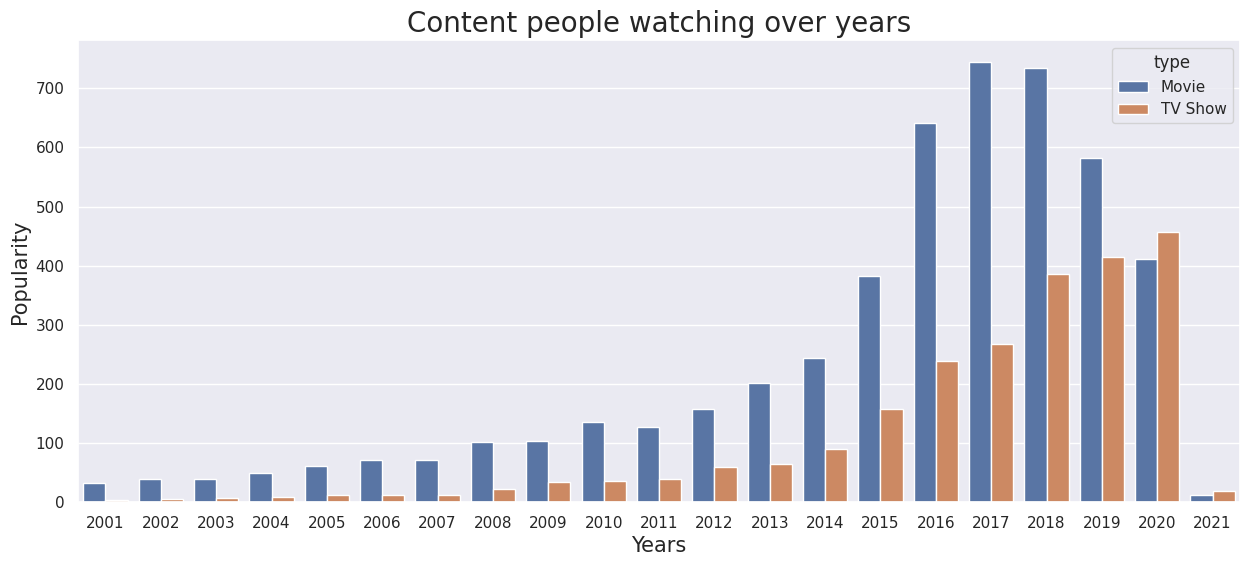

In [26]:
# setting the figure size
plt.figure(figsize=(15, 6))

# visualizing countplot
sns.countplot(data=growth_year, x='release_year', hue='type')
plt.title("Content people watching over years", size=20)
plt.xlabel("Years", size=15)
plt.ylabel("Popularity", size=15)
plt.show()

##### 1. Why did you pick the specific chart?

**To gain a good picture of what consumers choose to watch on Netflix over time.**

##### 2. What is/are the insight(s) found from the chart?

* When Netflix was less popular, consumers choose to watch mainly films.
* After 2008, a few people began viewing television shows, although the bulk of people still prefer films.
* After 2018, consumers preferred to watch both television shows and films.
* Following the pandemic (2020), people prefer watching TV shows over films.
* Nowadays, the majority of people prefer to watch television shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***The resulting insights, which indicate a historical shift away from films and towards a desire for both television episodes and films, have usually aided Netflix's effective adaptation of its content strategy. However, the recent trend towards TV shows, as well as the majority's liking for them, provide possible issues. Netflix must address this transformation carefully in order to maintain good business effect, maintaining a well-balanced content library that adapts to changing customer preferences and avoiding negative growth risks associated with a shifting viewing landscape.***

#### Chart - 3

In [27]:
movies = df[df['type'] == 'Movie']['duration'].str.replace('min', '').astype('int64')
tv_shows = df[df['type'] == 'TV Show']['duration'].value_counts().reset_index().rename(columns={'index': 'No of seasons', 'duration': 'count'})

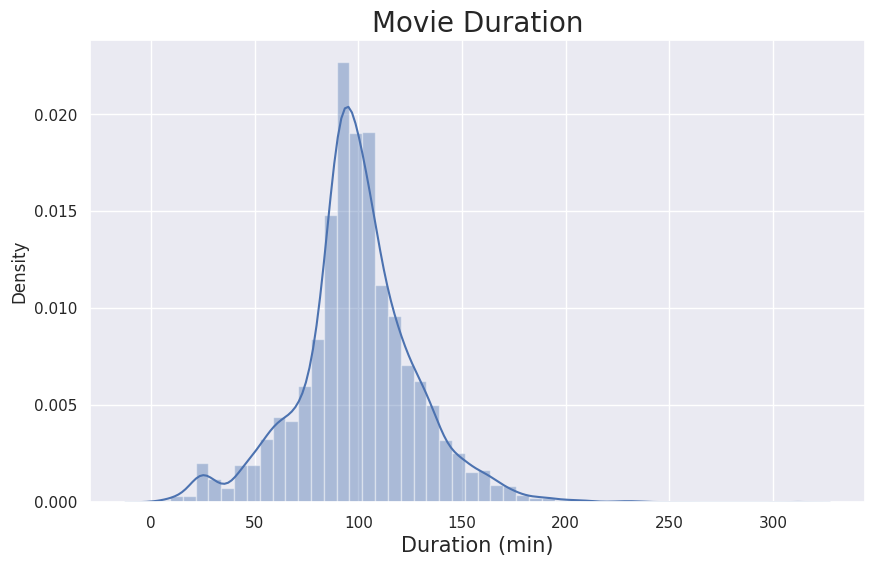

In [28]:
# setting the figure size
plt.figure(figsize=(10, 6))

# visualizing distribution plot
sns.distplot(movies)
plt.title("Movie Duration", size=20)
plt.xlabel("Duration (min)", size=15)
plt.show()

##### 1. Why did you pick the specific chart?

**To get a clear picture, depicting the duration of movies and tv shows.**

##### 2. What is/are the insight(s) found from the chart?

**The majority of films have a runtime of 70 to 120 minutes.**


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**The fact that the bulk of films have a length of 70 to 120 minutes can benefit Netflix's business by allowing for strategic curating. However, limiting content diversity if Netflix concentrates solely on this period may provide a negative growth risk, potentially leading to lower user satisfaction and attrition. Balancing content variety remains critical to maintaining favourable commercial impact.**

#### Chart - 4

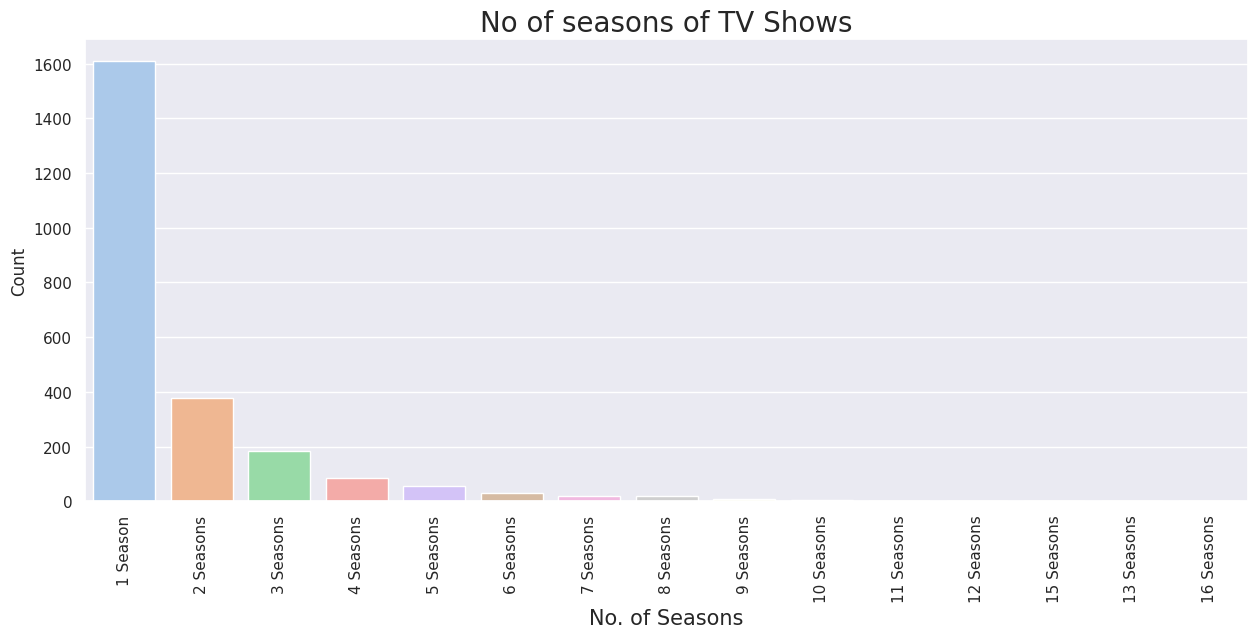

In [30]:
# setting the figure size
plt.figure(figsize=(15, 6))

# visualizing barplot plot
sns.barplot(data=tv_shows, x='No of seasons', y='count',palette='pastel')
plt.title("No of seasons of TV Shows", size=20)
plt.xlabel("No. of Seasons", size=15)
plt.ylabel("Count")
plt.xticks(rotation='vertical')
plt.show()

##### 1. Why did you pick the specific chart?

**To get a clear picture of number of seasons of any Tv show**

##### 2. What is/are the insight(s) found from the chart?

**Most TV shows have only one or two seasons. There are extremely few television shows that have more than five seasons.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**The insight that most TV shows have one or two seasons, with few exceeding five, provides an opportunity for Netflix to cater to viewers preferring shorter series. This could positively impact user engagement. However, there's a potential negative growth risk if Netflix overemphasizes shorter series, neglecting viewers seeking longer, more substantial content experiences, which may impact retention and overall content depth. Balancing the content library is crucial for sustained positive business impact.**

#### Chart - 5

In [31]:
def country_contribution_summary(data):
  '''
  This function returns the summary on contribution of countries
  '''
  # creating three empty list
  countries_lst = []
  tv_shows_lst = []
  movies_lst = []

  # appending country name to above lists accordingly
  for i in range(data.shape[0]):
    country = data['country'].iloc[i].split(',')
    for j in country:
      countries_lst.append(j.strip())
      if data['type'].iloc[i] == 'TV Show':
        tv_shows_lst.append(j.strip())
      elif data['type'].iloc[i] == 'Movie':
        movies_lst.append(j.strip())

  # creating a summary by counting the number of occurences
  summary = list(set([(i, countries_lst.count(i), tv_shows_lst.count(i), movies_lst.count(i)) for i in countries_lst]))
  return pd.DataFrame(summary, columns=['country', 'total_content', 'tv_shows', 'movies'])

In [32]:
# country contribution summary
country_df = country_contribution_summary(df)
country_df = country_df.sort_values('total_content', ascending=False).reset_index().drop('index', axis=1)
country_df.head()

,country,total_content,tv_shows,movies
0,United States,3797,1136,2661
1,India,990,75,915
2,United Kingdom,722,255,467
3,Canada,412,126,286
4,France,349,84,265


In [33]:
# top 10 countries contribution to netflix
top_10_countries = country_df.head(10)

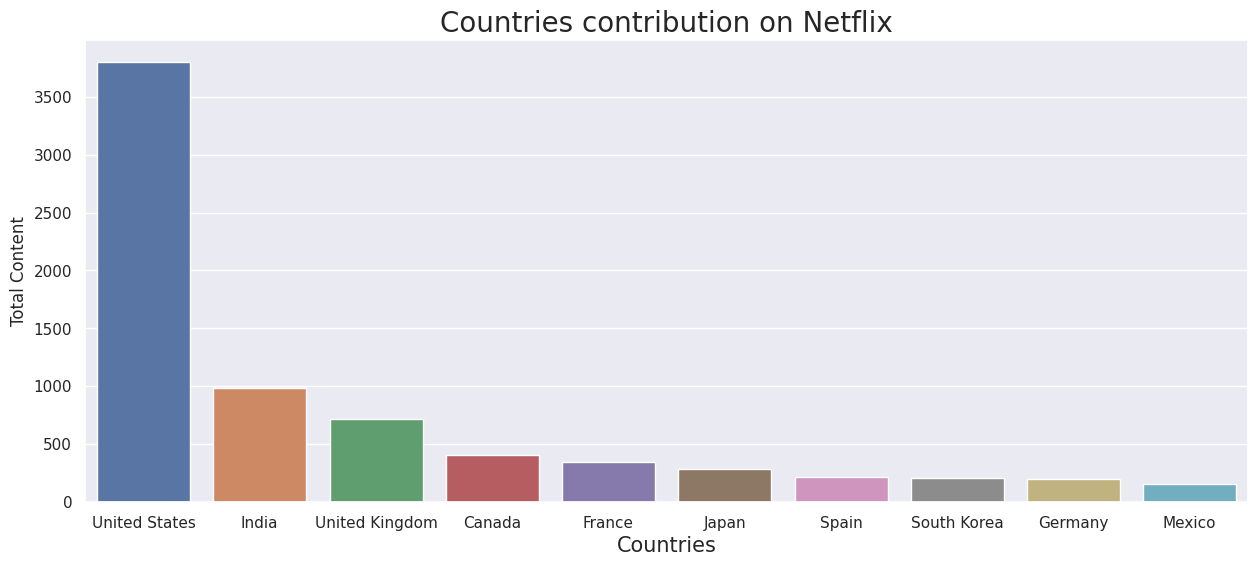

In [35]:
# setting the figure size
plt.figure(figsize=(15, 6))

# visualizing barplot plot
sns.barplot(data=top_10_countries, x='country', y='total_content',palette='deep')
plt.title("Countries contribution on Netflix", size=20)
plt.xlabel("Countries", size=15)
plt.ylabel("Total Content")
plt.show()

##### 1. Why did you pick the specific chart?

**To get a picture of contribution of different countries on Netflix.**

##### 2. What is/are the insight(s) found from the chart?

**Of all countries, the United States has contributed the most to Netflix, followed by India and the United Kingdom.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**The fact that the United States contributed the most to Netflix, followed by India and the United Kingdom, presents a chance for tailored strategies. However, overdependence on specific countries, particularly the United States, may constitute a negative economic risk. Diversifying market focus is critical for reducing sensitivity to regional economic volatility and shifting consumer behaviour.**

#### Chart - 6

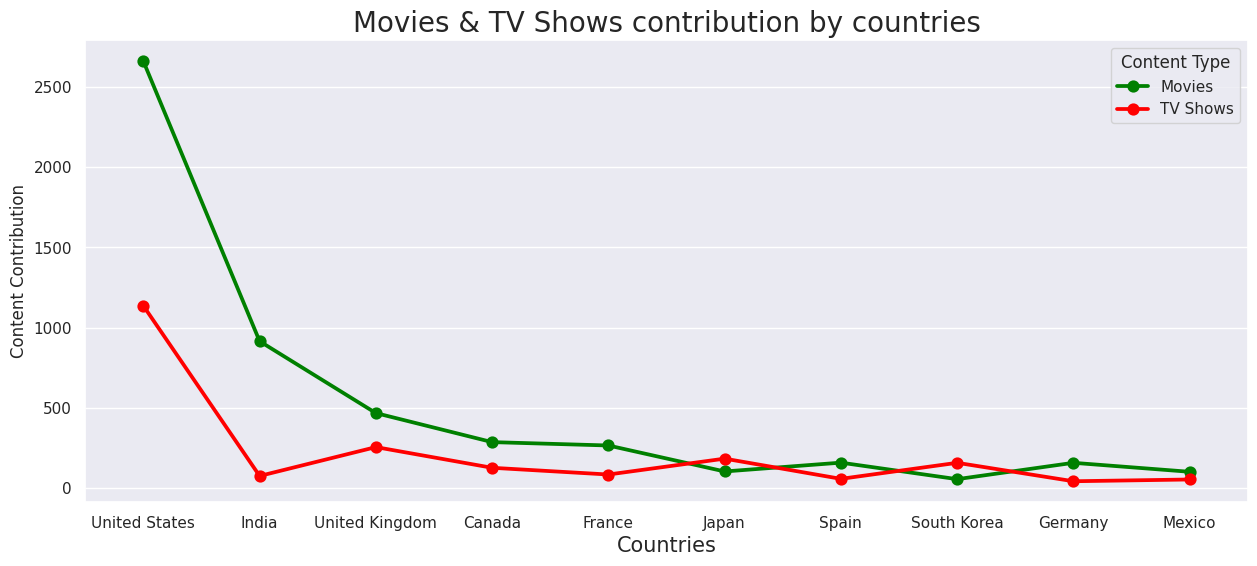

In [39]:
plt.figure(figsize=(15, 6))

# Visualizing pointplot plots for movies and TV shows
sns.pointplot(data=top_10_countries, x='country', y='movies', color='green', label='Movies')
sns.pointplot(data=top_10_countries, x='country', y='tv_shows', color='red', label='TV Shows')

# Adding legend
plt.legend(title='Content Type')

plt.title("Movies & TV Shows contribution by countries", size=20)
plt.xlabel("Countries", size=15)
plt.ylabel("Content Contribution")
plt.show()

##### 1. Why did you pick the specific chart?

**To get a clear picture of contribution made by top ten countries in movies and Tv shows.**

##### 2. What is/are the insight(s) found from the chart?

**The United States contributes the majority of films and television shows. India contributes more films than TV shows. Except for Japan and South Korea, every country contributes more films than television shows.**


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**The dominance of the United States and diversified overseas contributions indicate a positive global market presence for Netflix. However, potential negative growth risks include an overemphasis on films in some places, such as India, and a general tendency of more films than TV series in most nations, which may limit content variety and appeal to a wide range of audience interests. Balancing content offerings globally is critical for long-term good business impact.**

#### Chart - 7

In [40]:
# Movies
movies = df[df['type'] == 'Movie']['rating'].reset_index().drop('index', axis=1)

# TV Shows
tv_shows = df[df['type'] == 'TV Show']['rating'].reset_index().drop('index', axis=1)

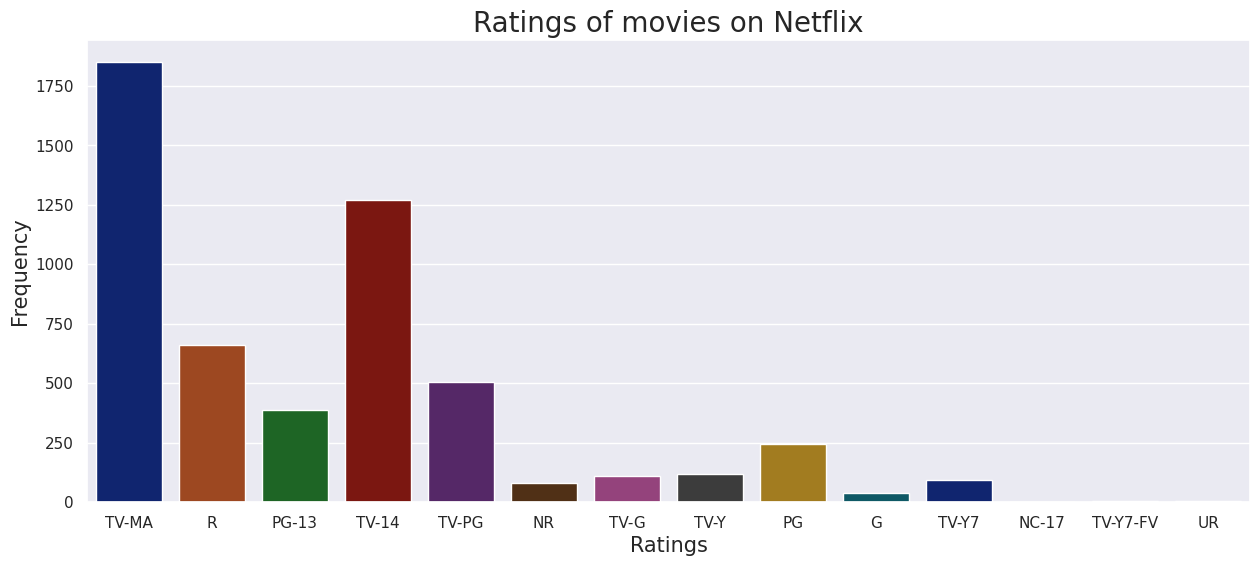



TV-MA = Mature Audience
R = Restricted
PG-13 = Parents Strongly Cautioned
TV-14 = Audience above 14 years
TV-PG = Parental Guidance Suggested
NR = Not Rated
TV-G = General Audience
TV-Y = Television Rating - Young Children
PG = Parental Guidance Suggested
G = General Audiences
TV-Y7 = Television Rating - Directed to Older Children
NC-17 = No One 17 and Under Admitted (formerly X-rated)
TV-Y7-FV = Television Rating - Directed to Older Children; Fantasy Violence
UR = Unrated


In [46]:
#Movies rating
#setting the figure size
plt.figure(figsize=(15, 6))

#visualizing countplot plot
sns.countplot(data=movies, x='rating',palette='dark')
plt.title("Ratings of movies on Netflix", size=20)
plt.xlabel("Ratings", size=15)
plt.ylabel("Frequency", size=15)
plt.show()

print("\n\nTV-MA = Mature Audience\nR = Restricted\nPG-13 = Parents Strongly Cautioned\nTV-14 = Audience above 14 years\nTV-PG = Parental Guidance Suggested\nNR = Not Rated\nTV-G = General Audience\nTV-Y = Television Rating - Young Children\nPG = Parental Guidance Suggested\nG = General Audiences\nTV-Y7 = Television Rating - Directed to Older Children\nNC-17 = No One 17 and Under Admitted (formerly X-rated)\nTV-Y7-FV = Television Rating - Directed to Older Children; Fantasy Violence\nUR = Unrated")

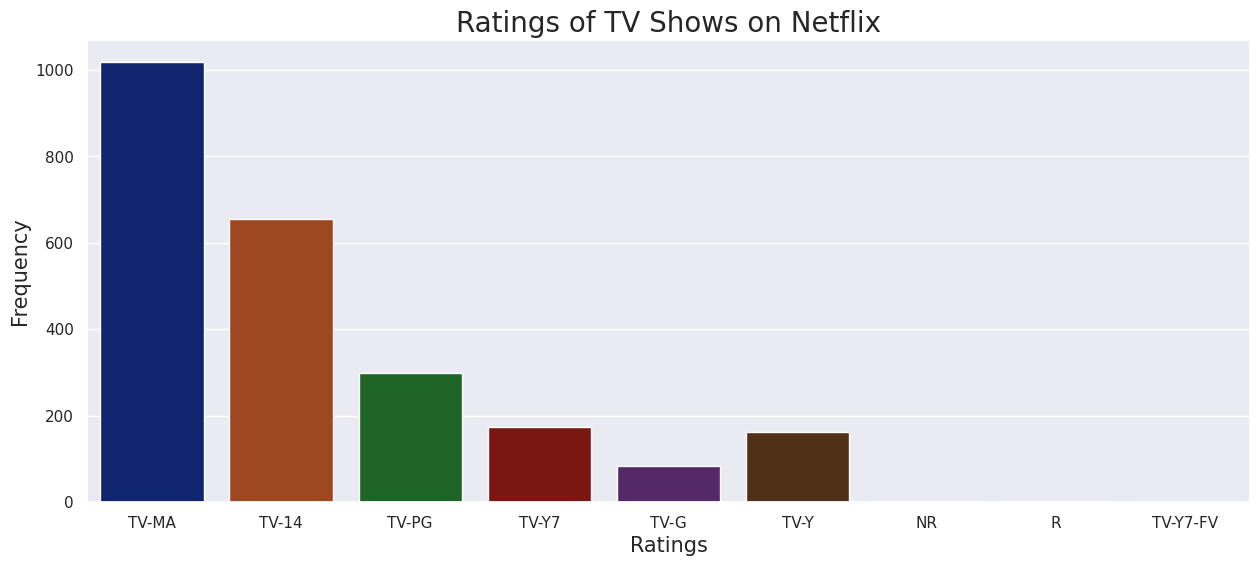



TV-MA = Mature Audience
R = Restricted
TV-14 = Audience above 14 years
TV-PG = Parental Guidance Suggested
NR = Not Rated
TV-G = General Audience
TV-Y = Television Rating - Young Children
TV-Y7 = Television Rating - Directed to Older Children
TV-Y7-FV = Television Rating - Directed to Older Children; Fantasy Violence


In [47]:
#Tv shows ratings
#setting the figure size
plt.figure(figsize=(15, 6))

#visualizing countplot plot
sns.countplot(data=tv_shows, x='rating',palette='dark')
plt.title("Ratings of TV Shows on Netflix", size=20)
plt.xlabel("Ratings", size=15)
plt.ylabel("Frequency", size=15)
plt.show()

print("\n\nTV-MA = Mature Audience\nR = Restricted\nTV-14 = Audience above 14 years\nTV-PG = Parental Guidance Suggested\nNR = Not Rated\nTV-G = General Audience\nTV-Y = Television Rating - Young Children\nTV-Y7 = Television Rating - Directed to Older Children\nTV-Y7-FV = Television Rating - Directed to Older Children; Fantasy Violence")

##### 1. Why did you pick the specific chart?

**The above two charts depicts ratings of movies and Tv shows on Netflix.**

##### 2. What is/are the insight(s) found from the chart?

**Netflix's films and TV shows are mostly geared towards mature audiences over the age of 14. Certain films and TV shows require parental supervision, while some are restricted. Overall, I believe Netflix is geared towards adults and is not appropriate for youngsters or anyone under the age of 18.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**The emphasis on mature audiences over 14 coincides with adult preferences, potentially increasing subscriber happiness and revenue. However, restricting content for younger groups may limit Netflix's attractiveness to families and stunt growth among younger users. Striking a balance between mature and family-friendly content is critical for maintaining favourable business effect and growing the platform's audience.**

#### Chart - 8

In [48]:
def genre_summary(data):
  '''
  This function returns the genres of movies and tv shows
  '''
  # creating an empty dictionary
  genre_dict = {}

  # getting the genres
  for i in range(data.shape[0]):
    genres = data['listed_in'].iloc[i].split(', ')
    for j in genres:
      if j in genre_dict:
        genre_dict[j] += 1
      else:
        genre_dict[j] = 1

  # creating two empty lists
  genre_lst = []
  occurence_lst = []

  # getting genres and their occurence
  for i, j in genre_dict.items():
    genre_lst.append(i)
    occurence_lst.append(j)

  return pd.DataFrame({'genres': genre_lst, 'count': occurence_lst}).sort_values('count', ascending=False).reset_index().drop('index', axis=1)

In [49]:
# movies
movies_data = df[df['type'] == 'Movie']

# Tv Shows
tv_shows_data = df[df['type'] == 'TV Show']

In [50]:
# Movies genres
movie_genres = genre_summary(movies_data)

# TV Shows genres
tv_shows_genres = genre_summary(tv_shows_data)

In [51]:
# top 10 movies genres
top_10_movie_genres = movie_genres.head(10)

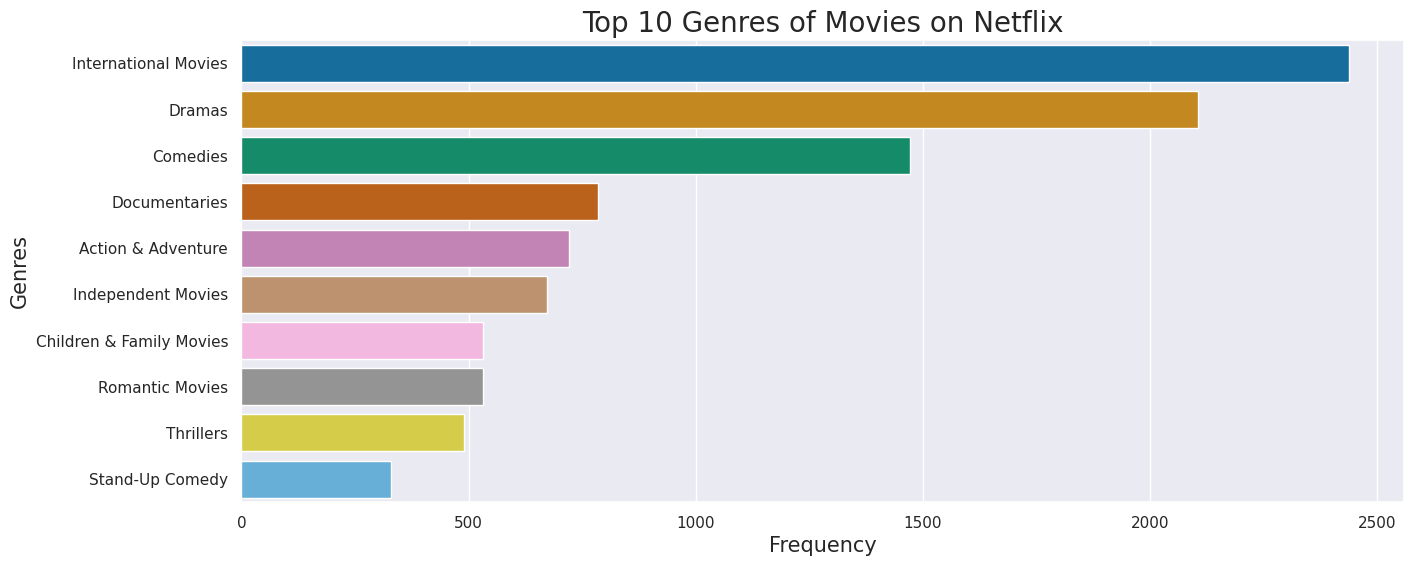

In [53]:
# setting the figure size
plt.figure(figsize=(15, 6))

# visualizing barplot
sns.barplot(data=top_10_movie_genres, y='genres', x='count',palette='colorblind')
plt.title("Top 10 Genres of Movies on Netflix", size=20)
plt.xlabel("Frequency", size=15)
plt.ylabel("Genres", size=15)
plt.show()

In [54]:
# top 10 tv shows genres
top_10_tv_shows_genres = tv_shows_genres.head(10)

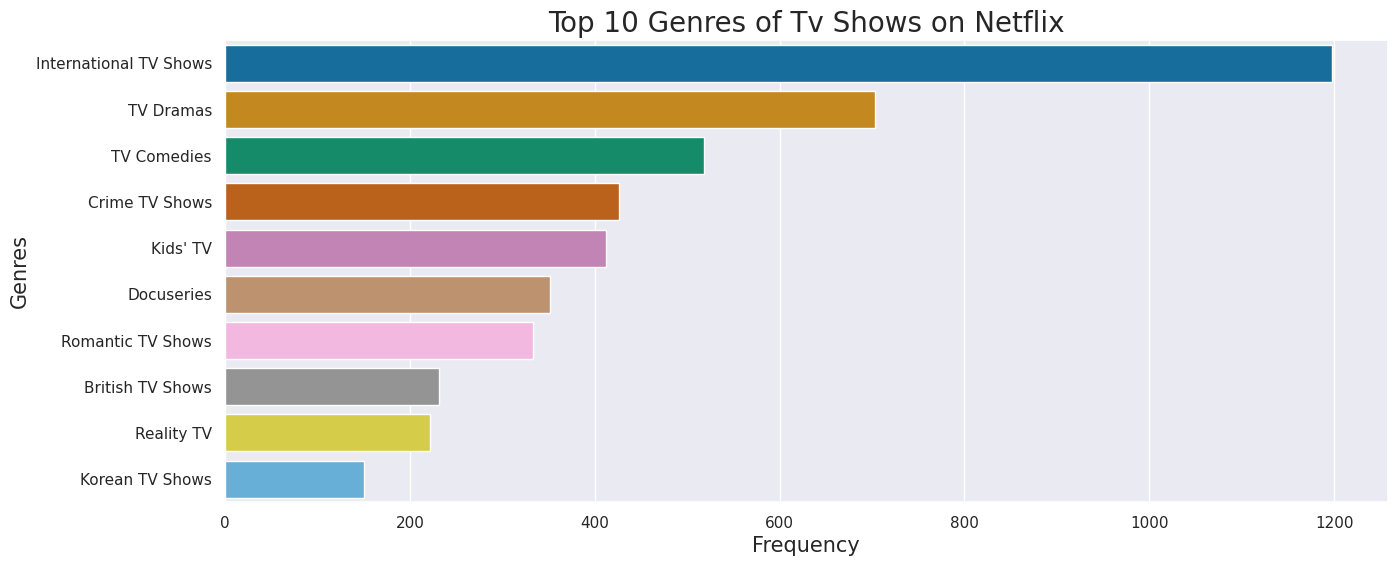

In [56]:
# setting the figure size
plt.figure(figsize=(15, 6))

# visualizing barplot
sns.barplot(data=top_10_tv_shows_genres, y='genres', x='count',palette='colorblind')
plt.title("Top 10 Genres of Tv Shows on Netflix", size=20)
plt.xlabel("Frequency", size=15)
plt.ylabel("Genres", size=15)
plt.show()

##### 1. Why did you pick the specific chart?

**Both of the charts above are intended to provide a clear understanding of the many genres of films and television shows available on Netflix.**

##### 2. What is/are the insight(s) found from the chart?

**The majority of movies are international, dramas, comedies, documentaries, action/adventure, thrillers, and romantic films.The majority of shows are international, dramas, comedy, crime, children's TV, romantic, and reality shows.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**The fact that most movies on Netflix come from around the world and that many popular genres are available is good for attracting a global audience. However, if Netflix focuses too much on just a few genres or only shows from other countries, it might miss out on viewers who like different types of content. It's important for Netflix to keep a variety of genres and also make sure to offer content that fits the preferences of people in different places for the best chance of continued success.**

#### Chart - 9

In [57]:
# creating a new column month_added
df['month_added'] = pd.to_datetime(df['date_added']).dt.month_name()

In [58]:
# unique values of month_added column
df['month_added'].unique()

array(['August', 'December', 'November', 'January', 'July', 'June',
       'April', 'October', 'May', 'March', 'September', 'February'],
      dtype=object)

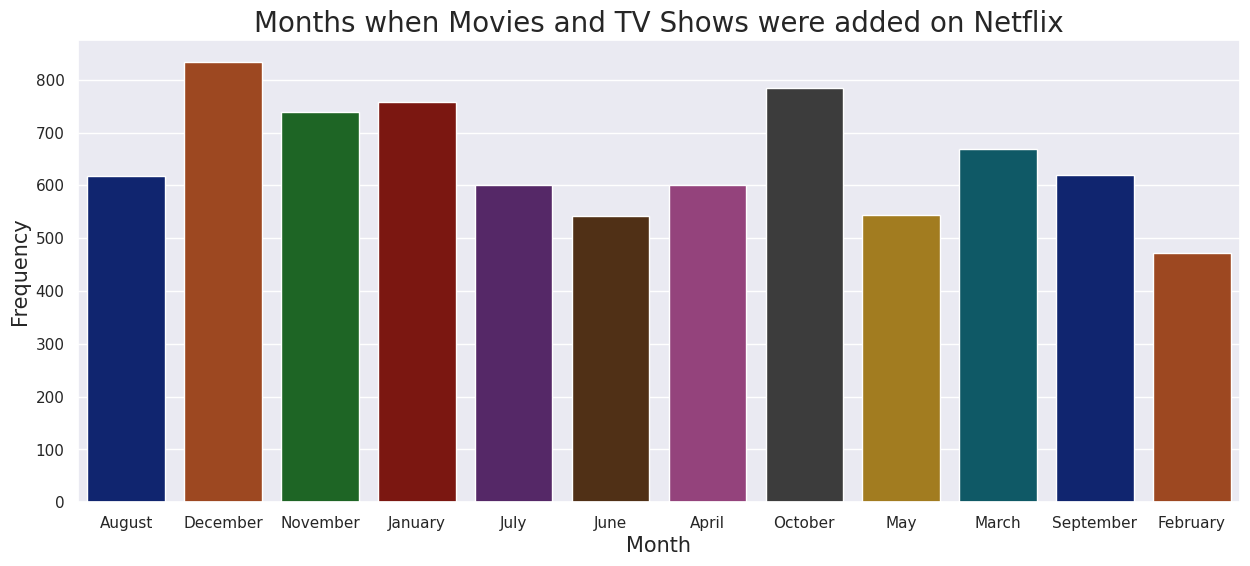

In [60]:
# setting the figure size
plt.figure(figsize=(15, 6))

# visualizing countplot
sns.countplot(data=df, x='month_added',palette='dark')
plt.title("Months when Movies and TV Shows were added on Netflix", size=20)
plt.xlabel("Month", size=15)
plt.ylabel("Frequency", size=15)
plt.show()

##### 1. Why did you pick the specific chart?

**To discover in which months new films and TV series were added to Netflix.**

##### 2. What is/are the insight(s) found from the chart?

**Movies and TV shows are typically added in December, coinciding with the popular Christmas holiday in Western countries. Aside from December, Netflix adds new films and TV shows every month.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**The fact that Netflix regularly adds material in December, which coincides with the Christmas holiday, can help it draw a larger audience throughout the holiday season. However, overemphasis on December may have a negative influence on overall participation throughout the year. Providing a constant monthly supply of various material is critical for subscriber retention and being competitive in the streaming market for long-term beneficial business impact.**

#### Chart - 10

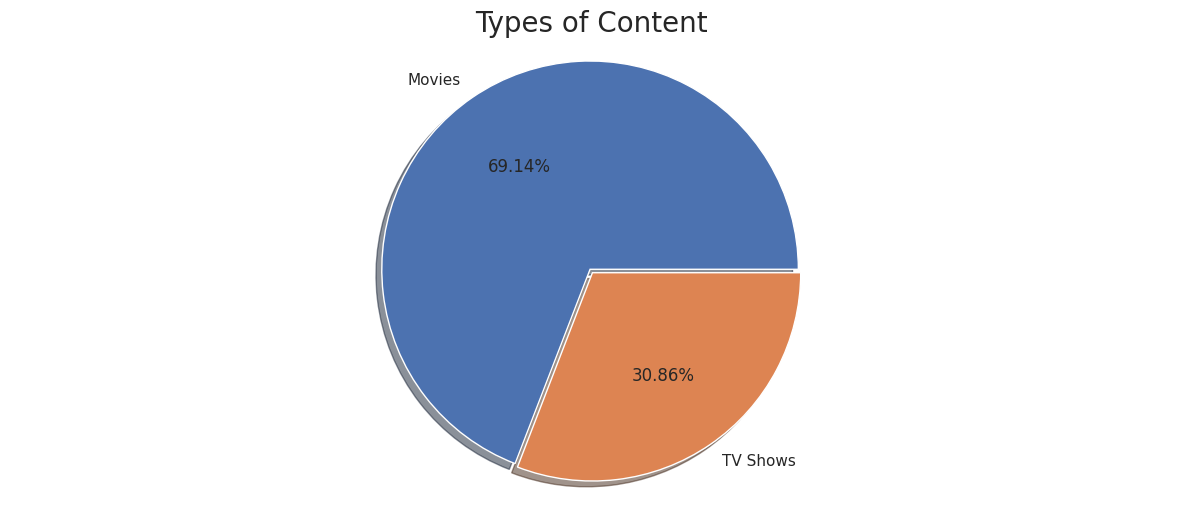

In [62]:
# setting the figure size
plt.figure(figsize=(15, 6))

# visualizing pie chart
plt.pie(df['type'].value_counts(), labels=['Movies', 'TV Shows'], explode=[0.01, 0.01], autopct='%1.2f%%',shadow=True)
plt.title("Types of Content", size=20)
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

**To see which type of content is available on Netflix.**

##### 2. What is/are the insight(s) found from the chart?

**Netflix offers two sorts of content: films and television shows. There are more films than TV shows. Movies are 69.14%, while TV shows are 30.86%.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**The fact that Netflix has a higher percentage of films (69.14%) than TV series (30.86%) enables for a more broad content collection that caters to a variety of audience preferences. However, an imbalance with much more films may represent a concern by limiting growth among consumers looking for additional TV show material. Striking a better balance between films and TV shows is critical for the streaming industry's long-term success and competitive advantage.**

#### Chart - 11

In [63]:
# movies
movies_df = df[df['type'] == 'Movie']

# tv shows
tv_shows_df = df[df['type'] == 'TV Show']

In [66]:
#common words in movies title
# getting words in the title of movies
word_cloud_df = movies_df['title']
words_in_title = ' '.join(word for word in word_cloud_df)

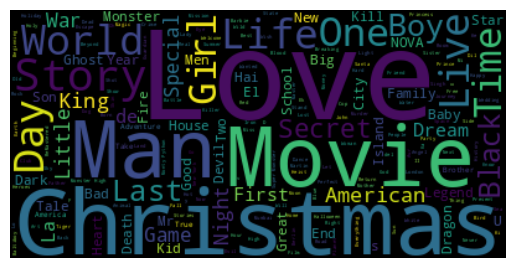

In [65]:
stop_words = set(STOPWORDS)

# Generating wordcloud image
wordcloud = WordCloud(stopwords=stop_words, background_color='black').generate(words_in_title)

# visualizing wordcloud image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [67]:
#common words in Tv shows title
# getting words in the title of tv shows
word_cloud_df = tv_shows_df['title']
words_in_title = ' '.join(word for word in word_cloud_df)

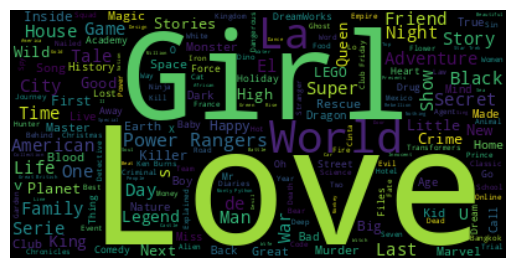

In [68]:
stop_words = set(STOPWORDS)

# Generating wordcloud image
wordcloud = WordCloud(stopwords=stop_words, background_color='black').generate(words_in_title)

# visualizing wordcloud image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##### 1. Why did you pick the specific chart?

**To find out which are the most used words in titling a movie name or a Tv show name.**

##### 2. What is/are the insight(s) found from the chart?

**In movies, words like Love, Christmas, Story, World, Live, Day are very common. In Tv Shows, words like Love, Girl, World, La, Stories, Tale are very common.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Common movie and television programme words can provide insights into marketing techniques, increasing audience engagement and facilitating seasonal campaigns.**

## ***Feature Engineering & Data Pre-processing***

In [71]:
data=df.copy()

## **Feature Encoding**

In [72]:
#Applying one hot encoding on type column
def one_hot_encoding(data, var_name):
  '''
  This function do one hot encoding on a specific column
  '''
  data = pd.concat([data, pd.get_dummies(data[var_name], prefix=var_name, drop_first=True)], axis=1)
  data = data.drop(var_name, axis=1)
  return data

In [73]:
data = one_hot_encoding(data, 'type')

In [74]:
data.head()

,title,country,date_added,release_year,rating,duration,listed_in,description,month_added,type_TV Show
0,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,1
1,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,0
2,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,0
3,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,0
4,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,0


# **Text Preprocessing**

**Removing punctuation**

In [76]:
#custom function for removing punctuation mark
def remove_punctuation(text):
  '''
  This function remove punctuation marks from a text
  '''
  no_punc_text = ''.join([char.lower() for char in text if char not in string.punctuation])
  return no_punc_text

In [77]:
# removing punctuation marks
data['listed_in'] = data['listed_in'].apply(remove_punctuation)
data['description'] = data['description'].apply(remove_punctuation)

In [78]:
print(data['listed_in'].iloc[0])
print(data['description'].iloc[0])

international tv shows tv dramas tv scifi  fantasy
in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor


**Removing Stopwords**

In [79]:
def remove_stopwords(text):
  '''
  This function remove stopwords from the text
  '''
  no_stopword = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
  return no_stopword

In [80]:
# removing stopwords
data['listed_in'] = data['listed_in'].apply(remove_stopwords)
data['description'] = data['description'].apply(remove_stopwords)

In [81]:
print(data['listed_in'].iloc[0])
print(data['description'].iloc[0])

international tv shows tv dramas tv scifi fantasy
future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor


**Counting the vocabulary words using CountVectorizer**

In [82]:
def count_vocab_words(data, col_name):
  '''
  This function returns the vocabulary words counts in a text
  '''
  count_vectorizer = CountVectorizer()
  # fitting the count vectorizer
  count_vectorizer.fit(data[col_name])
  return count_vectorizer.vocabulary_.items()

In [83]:
# counting the vocabulary
listed_in_vocab_items = count_vocab_words(data, 'listed_in')
description_vocab_items = count_vocab_words(data, 'description')

In [84]:
print("Total Vocabulary words: ", len(listed_in_vocab_items))
print("The Vocab Words are : ")
print(listed_in_vocab_items)

Total Vocabulary words:  42
The Vocab Words are : 
dict_items([('international', 19), ('tv', 41), ('shows', 33), ('dramas', 12), ('scifi', 31), ('fantasy', 15), ('movies', 23), ('horror', 17), ('action', 0), ('adventure', 1), ('independent', 18), ('mysteries', 26), ('thrillers', 40), ('crime', 8), ('docuseries', 11), ('documentaries', 10), ('sports', 36), ('comedies', 6), ('anime', 2), ('series', 32), ('reality', 28), ('romantic', 29), ('science', 30), ('nature', 27), ('british', 3), ('korean', 21), ('music', 24), ('musicals', 25), ('lgbtq', 22), ('faith', 13), ('spirituality', 35), ('kids', 20), ('spanishlanguage', 34), ('children', 4), ('family', 14), ('classic', 5), ('cult', 9), ('standup', 37), ('comedy', 7), ('talk', 38), ('teen', 39), ('features', 16)])


In [85]:
# Top 10 words occured in genres
pd.DataFrame(listed_in_vocab_items, columns=['Word', 'Occurence']).sort_values('Occurence', ascending=False).set_index('Word').head(10)

,Occurence
Word,
tv,41
thrillers,40
teen,39
talk,38
standup,37
sports,36
spirituality,35
spanishlanguage,34
shows,33


In [86]:
print("Total Vocabulary words: ", len(description_vocab_items))
print("The Vocab Words are : ")
print(description_vocab_items)

Total Vocabulary words:  19594
The Vocab Words are : 
dict_items([('future', 7153), ('elite', 5642), ('inhabit', 8945), ('island', 9221), ('paradise', 12668), ('far', 6398), ('crowded', 4230), ('slums', 16086), ('get', 7349), ('one', 12297), ('chance', 3060), ('join', 9439), ('saved', 15190), ('squalor', 16502), ('devastating', 4825), ('earthquake', 5491), ('hits', 8306), ('mexico', 11098), ('city', 3326), ('trapped', 17904), ('survivors', 17050), ('walks', 18862), ('life', 10168), ('wait', 18839), ('rescued', 14507), ('trying', 18046), ('desperately', 4778), ('stay', 16611), ('alive', 781), ('army', 1222), ('recruit', 14227), ('found', 6937), ('dead', 4492), ('fellow', 6524), ('soldiers', 16211), ('forced', 6873), ('confront', 3780), ('terrifying', 17426), ('secret', 15378), ('thats', 17480), ('haunting', 8010), ('jungle', 9534), ('training', 17861), ('camp', 2751), ('postapocalyptic', 13347), ('world', 19299), ('ragdoll', 13946), ('robots', 14833), ('hide', 8185), ('fear', 6477), ('d

In [87]:
# Top 10 words occured in description
pd.DataFrame(description_vocab_items, columns=['Word', 'Occurence']).sort_values('Occurence', ascending=False).set_index('Word').head(10)

,Occurence
Word,
şeref,19593
ōarai,19592
łukasz,19591
überelite,19590
über,19589
ömer,19588
émile,19587
ángel,19586
álvaro,19585


**Applying Lemmanization or Stemming**

In [88]:
def stemming(text):
  '''
  This function apply stemming on text
  '''
  stemmer = SnowballStemmer('english')
  stemmed_text = ' '.join([stemmer.stem(word) for word in text.split()])
  return stemmed_text

In [89]:
# Applying stemming
data['listed_in'] = data['listed_in'].apply(stemming)
data['description'] = data['description'].apply(stemming)

In [90]:
print(data['listed_in'].iloc[0])
print(data['description'].iloc[0])

intern tv show tv drama tv scifi fantasi
futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor


In [91]:
#Again counting vocab words after stemming
listed_in_vocab_items = count_vocab_words(data, 'listed_in')
description_vocab_items = count_vocab_words(data, 'description')

In [92]:
print("Total Vocabulary words: ", len(listed_in_vocab_items))
print("The Vocab Words are : ")
print(listed_in_vocab_items)

Total Vocabulary words:  40
The Vocab Words are : 
dict_items([('intern', 18), ('tv', 39), ('show', 31), ('drama', 11), ('scifi', 29), ('fantasi', 14), ('movi', 22), ('horror', 16), ('action', 0), ('adventur', 1), ('independ', 17), ('mysteri', 24), ('thriller', 38), ('crime', 7), ('docuseri', 10), ('documentari', 9), ('sport', 34), ('comedi', 6), ('anim', 2), ('seri', 30), ('realiti', 26), ('romant', 27), ('scienc', 28), ('natur', 25), ('british', 3), ('korean', 20), ('music', 23), ('lgbtq', 21), ('faith', 12), ('spiritu', 33), ('kid', 19), ('spanishlanguag', 32), ('children', 4), ('famili', 13), ('classic', 5), ('cult', 8), ('standup', 35), ('talk', 36), ('teen', 37), ('featur', 15)])


In [93]:
# Top 10 words occured in genres after stemming
pd.DataFrame(listed_in_vocab_items, columns=['Word', 'Occurence']).sort_values('Occurence', ascending=False).set_index('Word').head(10)

,Occurence
Word,
tv,39
thriller,38
teen,37
talk,36
standup,35
sport,34
spiritu,33
spanishlanguag,32
show,31


In [94]:
print("Total Vocabulary words: ", len(description_vocab_items))
print("The Vocab Words are : ")
print(description_vocab_items)

Total Vocabulary words:  14241
The Vocab Words are : 
dict_items([('futur', 5120), ('elit', 4104), ('inhabit', 6479), ('island', 6648), ('paradis', 9343), ('far', 4577), ('crowd', 3135), ('slum', 11667), ('get', 5273), ('one', 9068), ('chanc', 2358), ('join', 6830), ('save', 11024), ('squalor', 11975), ('devast', 3534), ('earthquak', 3994), ('hit', 6028), ('mexico', 8135), ('citi', 2565), ('trap', 12960), ('survivor', 12363), ('walk', 13678), ('life', 7419), ('wait', 13666), ('rescu', 10542), ('tri', 12989), ('desper', 3506), ('stay', 12057), ('aliv', 632), ('armi', 972), ('recruit', 10386), ('found', 4957), ('dead', 3330), ('fellow', 4667), ('soldier', 11765), ('forc', 4910), ('confront', 2855), ('terrifi', 12633), ('secret', 11154), ('that', 12664), ('haunt', 5804), ('jungl', 6901), ('train', 12940), ('camp', 2132), ('postapocalypt', 9818), ('world', 13996), ('ragdol', 10205), ('robot', 10735), ('hide', 5947), ('fear', 4636), ('danger', 3276), ('machin', 7697), ('extermin', 4487), ('

In [95]:
# Top 10 words occured in description after stemming
pd.DataFrame(description_vocab_items, columns=['Word', 'Occurence']).sort_values('Occurence', ascending=False).set_index('Word').head(10)

,Occurence
Word,
şeref,14240
ōarai,14239
łukasz,14238
überelit,14237
über,14236
ömer,14235
émile,14234
ángel,14233
álvaro,14232


# **Creating features for Clustering**

In [96]:
# creating column containing the length of preprocessed words in listed_in and description
data['genres_length'] = data['listed_in'].apply(lambda x: len(x))
data['description_length'] = data['description'].apply(lambda x: len(x))

In [97]:
data.head()

,title,country,date_added,release_year,rating,duration,listed_in,description,month_added,type_TV Show,genres_length,description_length
0,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,August,1,40,82
1,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,drama intern movi,devast earthquak hit mexico citi trap survivor...,December,0,17,88
2,23:59,Singapore,"December 20, 2018",2011,R,78 min,horror movi intern movi,armi recruit found dead fellow soldier forc co...,December,0,23,102
3,9,United States,"November 16, 2017",2009,PG-13,80 min,action adventur independ movi scifi fantasi,postapocalypt world ragdol robot hide fear dan...,November,0,43,89
4,21,United States,"January 1, 2020",2008,PG-13,123 min,drama,brilliant group student becom cardcount expert...,January,0,5,99


In [98]:
# selecting features for clustering
clustering_df = data[['type_TV Show', 'genres_length', 'description_length']]
clustering_df.head()

,type_TV Show,genres_length,description_length
0,1,40,82
1,0,17,88
2,0,23,102
3,0,43,89
4,0,5,99


**Feature Scaling**

In [99]:
# scaling features with StandardScaker
scaler = StandardScaler()
scaler.fit(clustering_df)
X = scaler.transform(clustering_df)
X

array([[ 1.49680215,  1.46675528, -1.02211933],
       [-0.66809097, -0.68583605, -0.4651531 ],
       [-0.66809097, -0.12429048,  0.83443477],
       ...,
       [-0.66809097,  0.99880064,  0.27746854],
       [ 1.49680215,  0.06289137,  1.11291789],
       [-0.66809097, -0.12429048, -0.4651531 ]])

**ML Model Implementation**

**It is an Unsupervised Machine Learning problem because the target variable is not present, and in Unsupervised Learning, clustering is used instead of prediction.**

**Clustering is the process of organizing objects into groups whose members are similar in some way.A cluster is therefore a collection of objects which are “similar” between them and are “dissimilar” to the objects belonging to other clusters.**

**K Means Clustering:**

**The most challenging part of clustering is to find the best value of K (number of clusters). To find the value of K we will use, Elbow method and Silhoutte Score.**

**Elbow Method:**

In [100]:
# finding best value of K with Elbow method
wcss = []
range_n_clusters = range(1, 11)

for i in range_n_clusters:
  k_means = KMeans(n_clusters=i, init = 'k-means++', random_state = 42)
  k_means.fit(X)
  wcss.append(k_means.inertia_)

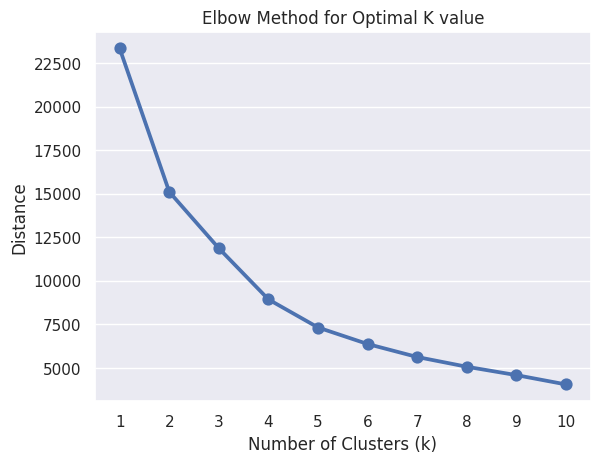

In [102]:
# visualizing for K value
sns.pointplot(x=list(range_n_clusters), y=wcss)
plt.title("Elbow Method for Optimal K value")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distance")
plt.show()

## optimal value for k is 2

**Silhouette Score:**

In [103]:
# finding optimal value for k with silhouette score
s_score = []
range_n_clusters = range(2, 12)

for i in range_n_clusters:
  k_means = KMeans(n_clusters=i, random_state=10)
  k_means.fit(X)
  labels = k_means.predict(X)
  s_score.append(round(silhouette_score(X, labels), 3))
  print(f"For cluster {i}, Silhouette Score is {round(silhouette_score(X, labels), 3)}")

For cluster 2, Silhouette Score is 0.427
For cluster 3, Silhouette Score is 0.317
For cluster 4, Silhouette Score is 0.362
For cluster 5, Silhouette Score is 0.371
For cluster 6, Silhouette Score is 0.365
For cluster 7, Silhouette Score is 0.354
For cluster 8, Silhouette Score is 0.348
For cluster 9, Silhouette Score is 0.346
For cluster 10, Silhouette Score is 0.338
For cluster 11, Silhouette Score is 0.348


For n_clusters = 2 The average silhouette_score is : 0.42738750156307637
For n_clusters = 3 The average silhouette_score is : 0.3174852582377789
For n_clusters = 4 The average silhouette_score is : 0.36152688491883755
For n_clusters = 5 The average silhouette_score is : 0.3653948565318735
For n_clusters = 6 The average silhouette_score is : 0.3649245999355788


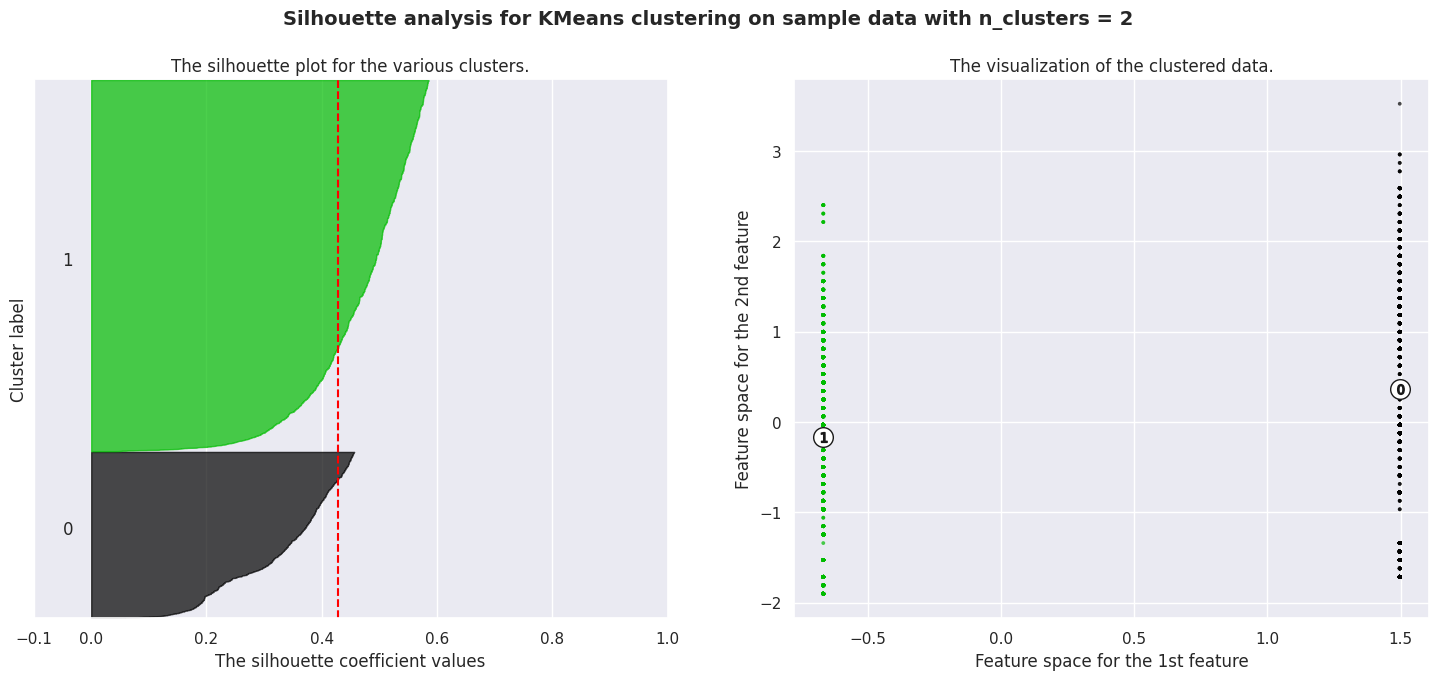

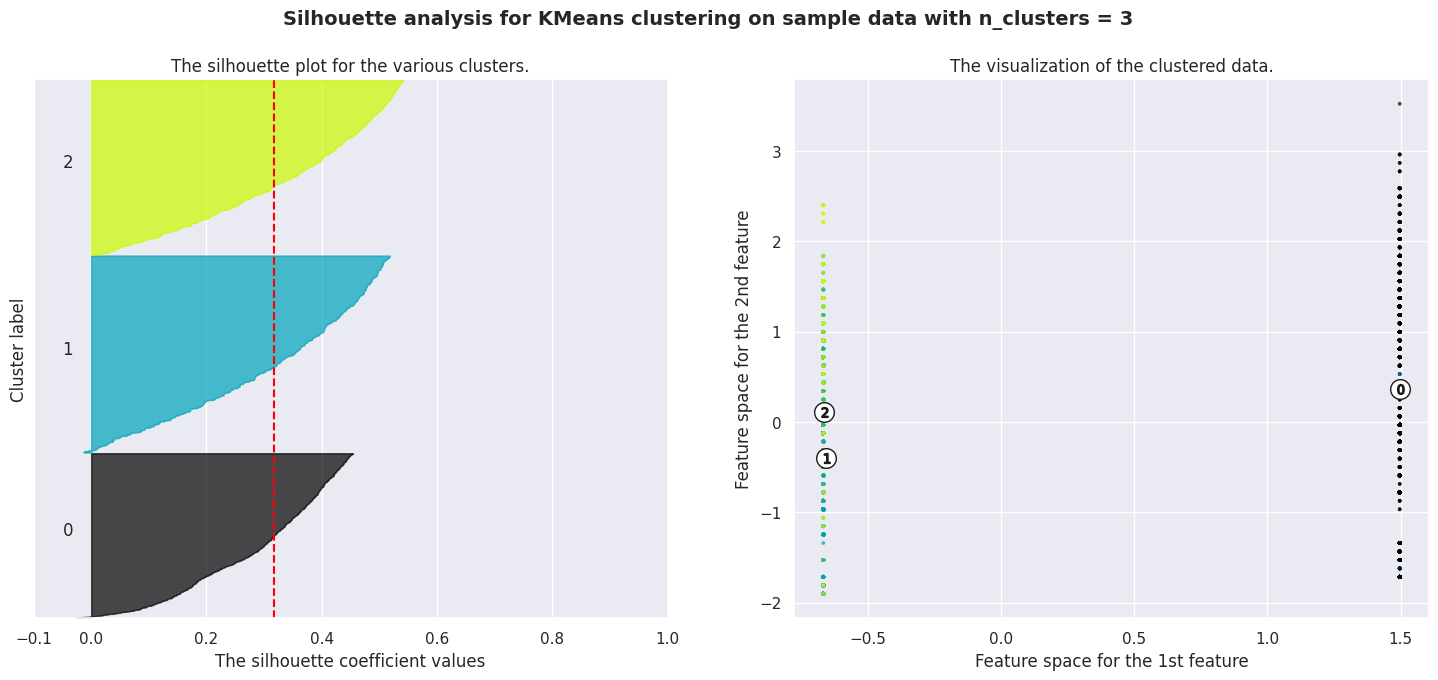

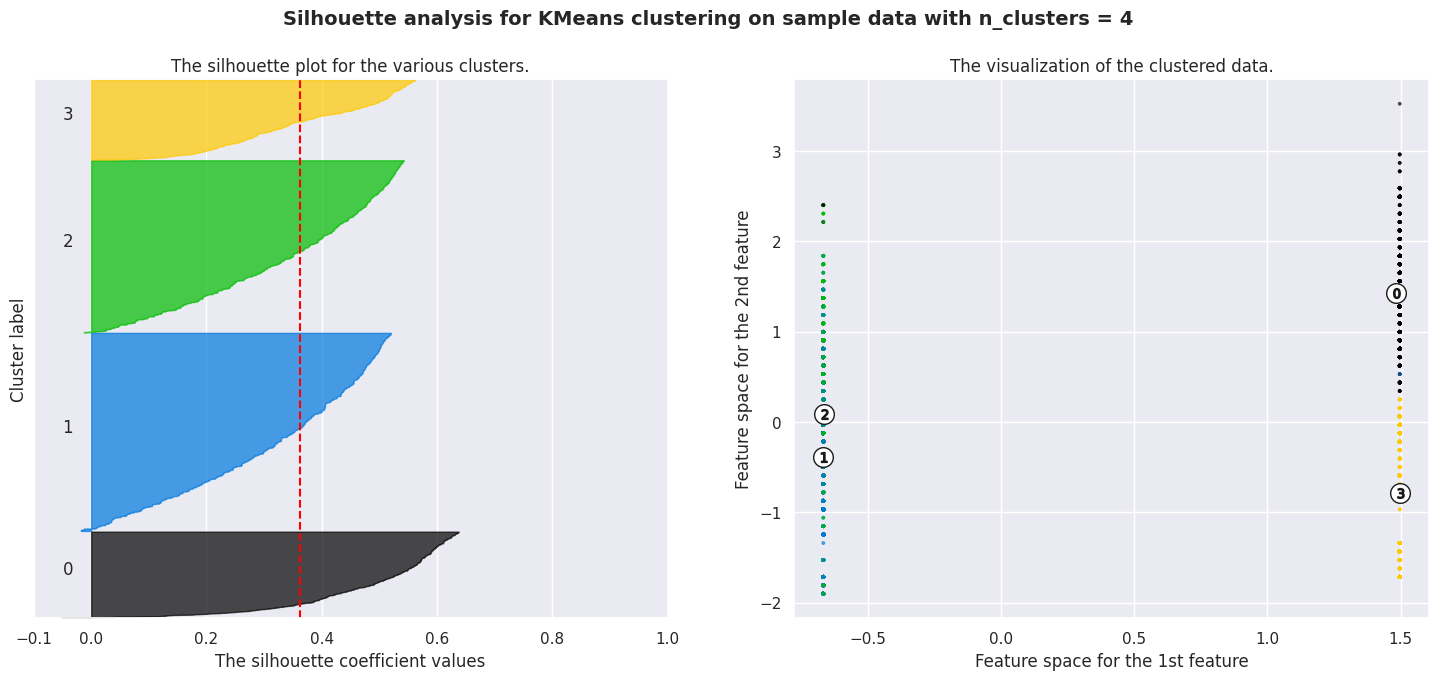

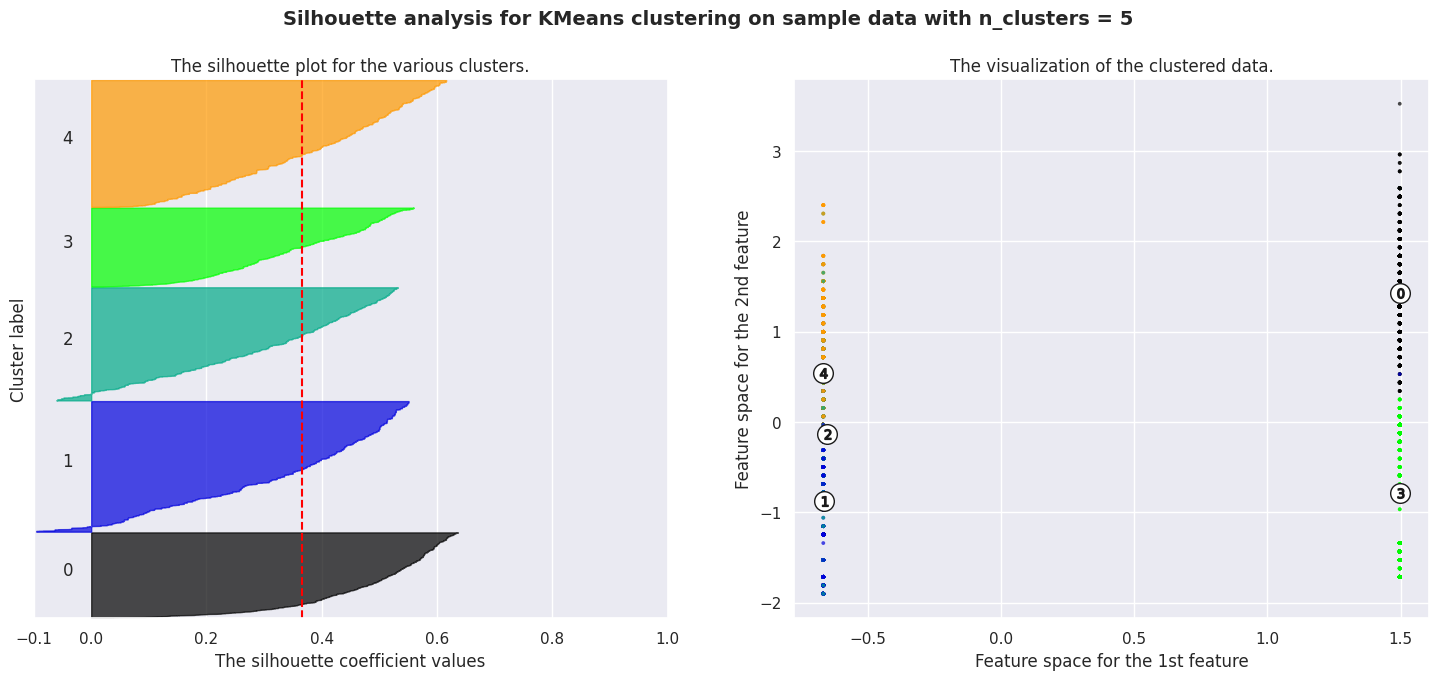

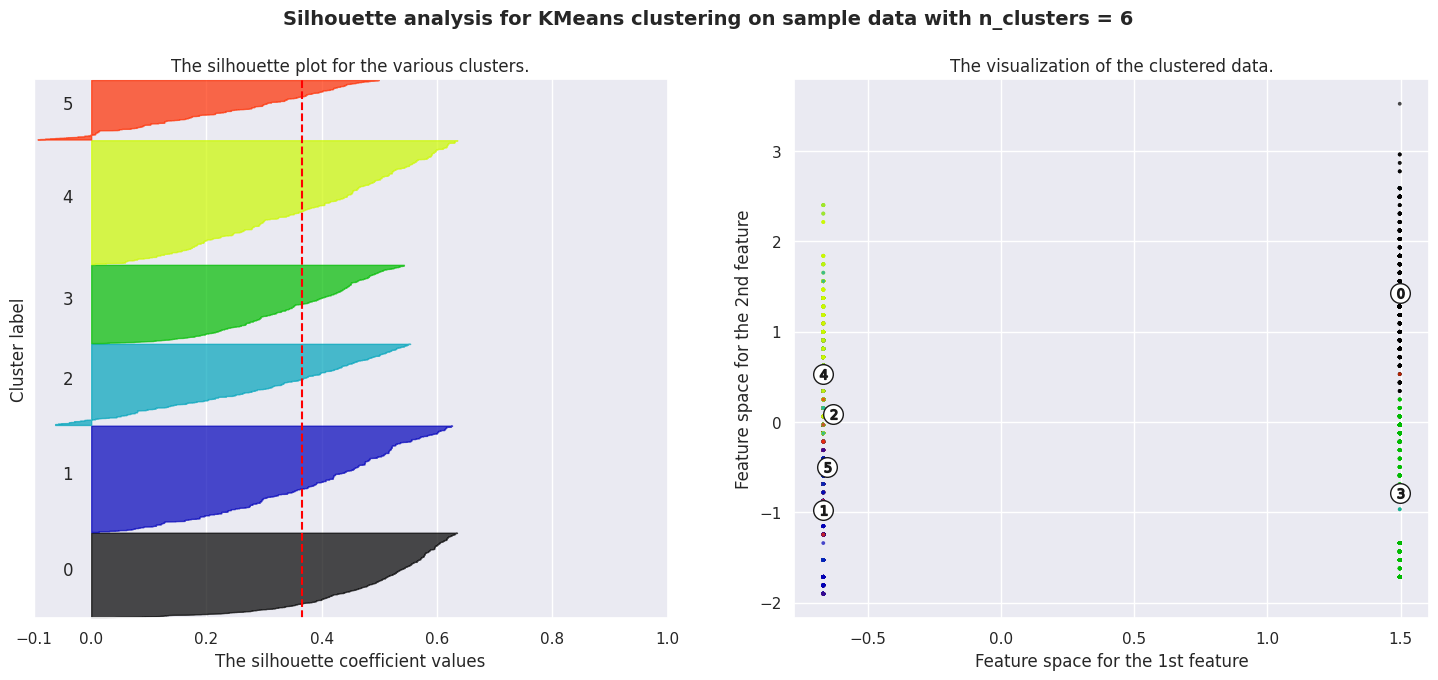

In [112]:
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
                facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,    edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

**Highest Silhouette score is when the K(Number of clusters)'s value is 2.**

## **Applying K-Means Clustering with K=2:**

In [113]:
# applying KMeans with K = 2
k_means = KMeans(n_clusters=2, random_state=10)
k_means.fit(X)
y_pred_kmeans = k_means.predict(X)

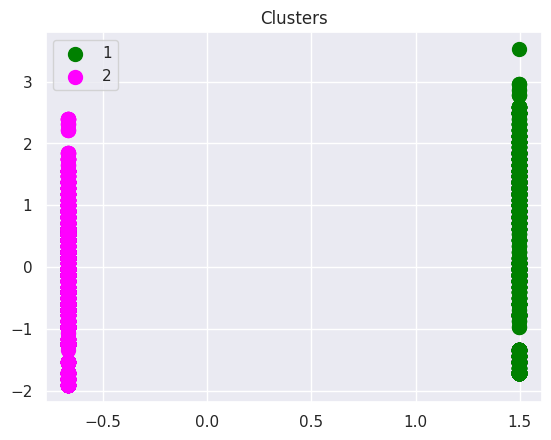

In [114]:
# Visualizing the clusters (two dimensions only)
plt.scatter(X[y_pred_kmeans == 0, 0], X[y_pred_kmeans == 0, 1], s = 100, c = 'green', label = '1')
plt.scatter(X[y_pred_kmeans == 1, 0], X[y_pred_kmeans == 1, 1], s = 100, c = 'magenta', label = '2')
plt.title('Clusters')
plt.legend()
plt.show()

## **Hierarchial Clustering**

**Finding the best possible number of clusters by visualizing dendogram**

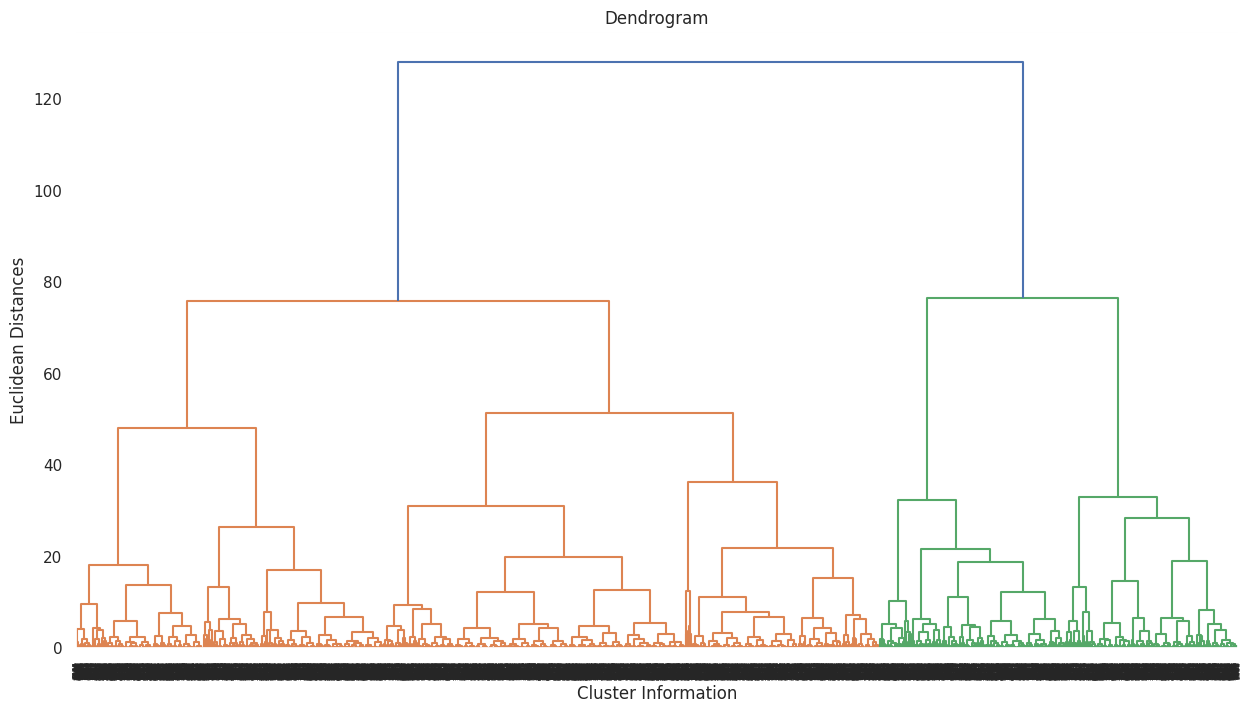

In [115]:
# setting up the figure size
plt.figure(figsize=(15,8))

# visualizing dendogram
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Cluster Information')
plt.ylabel('Euclidean Distances')
plt.show()

**How do we determine the number of clusters in hierarchical clustering?**
****
A dendrogram is a tree-like graphic that represents the sequences of merges and splits.The distance between clusters increases as the vertical lines in the dendrogram become longer.

We can define a threshold distance and draw a horizontal line (usually, we aim to set the threshold so that it cuts the tallest vertical line).

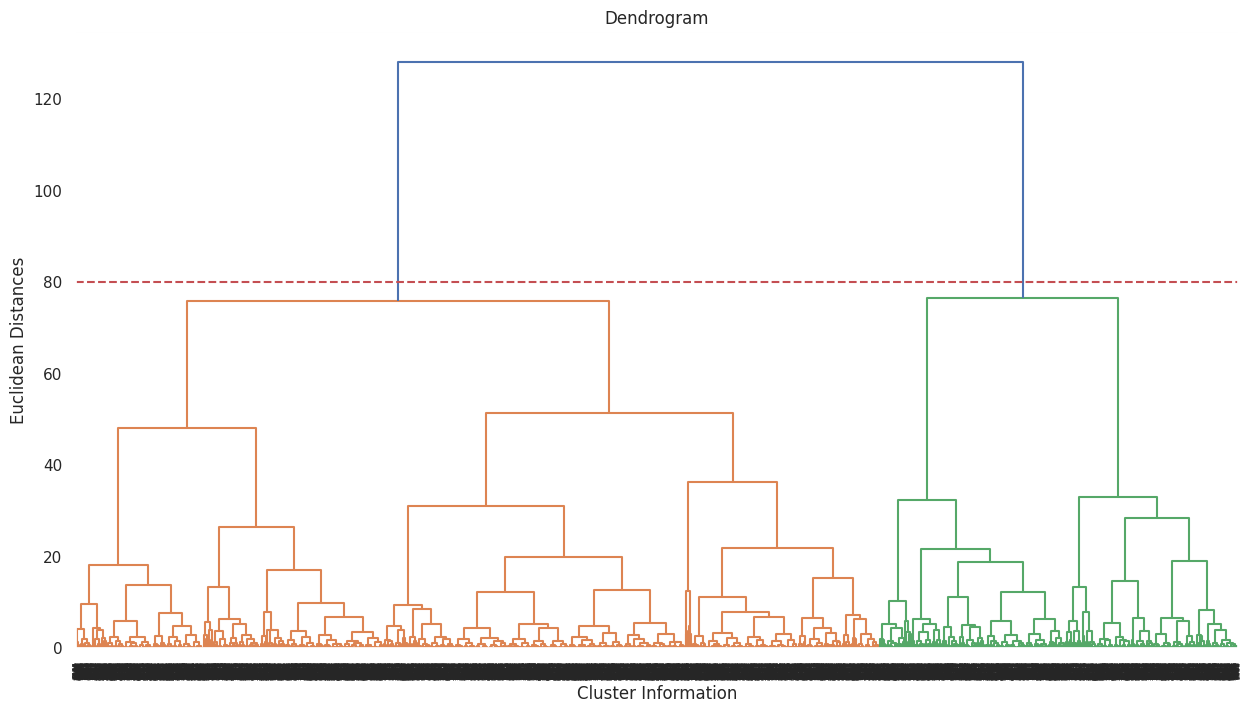

In [116]:
# setting up the figure size
plt.figure(figsize=(15,8))

# visualizing dendogram
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Cluster Information')
plt.ylabel('Euclidean Distances')
plt.axhline(y=80, color='r', linestyle='--')
plt.show()

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

In [ ]:
#Handling null values
df['cast'].fillna(value='No cast',inplace=True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)

#date_added and rating contains inappropriate data so it is better to drop these columns
df.dropna(subset=['date_added','rating'],inplace=True)

#Dropping director column
df.drop(['director'],axis=1,inplace=True)
#checking for the null values after dropping inappropriate data
df.isnull().sum()

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***